# Импортируем необходимые инструменты

In [1099]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from datetime import datetime, timedelta 

# Загрузим и посмотрим на датасет

In [1100]:
data = pd.read_csv('main_task.csv')

In [1101]:
display(data.head(10)) 
display(data.info())
display(data.describe())
display(data.describe(include = ['object']))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

,Ranking,Rating,Number of Reviews
count,40000.000000,40000.000000,37457.000000
mean,3676.028525,3.993037,124.825480
std,3708.749567,0.668417,295.666352
min,1.000000,1.000000,2.000000
25%,973.000000,3.500000,9.000000
50%,2285.000000,4.000000,33.000000
75%,5260.000000,4.500000,115.000000
max,16444.000000,5.000000,9660.000000


,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,40000,40000,30717,26114,40000,40000,40000
unique,11909,31,9007,3,33516,39980,39980
top,id_871,London,['Italian'],$$ - $$$,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d697406
freq,18,5757,1032,18412,6471,2,2


In [1102]:
# приведем наименование некоторых столбцов к более удобному виду, уберем пробелы
data = data.rename(columns={'Cuisine Style': 'Cuisine_Style','Price Range': 'Price_Range', 'Number of Reviews': 
                            'Number_of_Reviews'})

# Рассмотрим все 10 столбцов по отдельности, выполним очистку и преобразование данных, выполним EDA, создадим новые признаки для модели

###  Restaurant_id — идентификационный номер ресторана / сети ресторанов

In [1103]:
data.loc[:, ['Restaurant_id']].info()
display(pd.DataFrame(data.Restaurant_id.value_counts()))
data.Restaurant_id.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant_id  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


,Restaurant_id
id_871,18
id_633,18
id_227,18
id_436,18
id_430,17
...,...
id_7508,1
id_7165,1
id_15027,1
id_3974,1


count      40000
unique     11909
top       id_871
freq          18
Name: Restaurant_id, dtype: object

##### нет пропусков, категориальный признак, ID повторяются достаточно часто, предположим, что это сети ресторанов

In [1104]:
# формируем соотвествующий признак
# "0" - Restaurant_id - уникальный
# "1" - Restaurant_id повторяется (предположим, это сеть)
chain = data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts()>1].index.tolist()
data['Сhain'] = data[data.Restaurant_id.isin(chain)].Restaurant_id.apply(lambda x: 1)
data.Сhain = data['Сhain'].fillna(0)

###  City — город, в котором находится ресторан

In [1105]:
data.loc[:, ['City']].info()
display(pd.DataFrame(data.City.value_counts()))
data.City.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


,City
London,5757
Paris,4897
Madrid,3108
Barcelona,2734
Berlin,2155
Milan,2133
Rome,2078
Prague,1443
Lisbon,1300
Vienna,1166


count      40000
unique        31
top       London
freq        5757
Name: City, dtype: object

#### нет пропусков, категориальный признак, всего 31 город, преобразуем методом get_dummies, подход - One-Hot Encoding, исходную колонку пока сохраним

In [1106]:
data['City_gd'] = data['City']
data = pd.get_dummies(data, columns=[ 'City_gd',], dummy_na=True)
# так как пропущенных значений нет столбец City_gd_nan удалим
data = data.drop(['City_gd_nan'], axis = 1)

###  Cuisine_Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане

In [1107]:
data.loc[:, ['Cuisine_Style']].info()
display(pd.DataFrame(data.Cuisine_Style.value_counts()))
data.Cuisine_Style.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cuisine_Style  30717 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


,Cuisine_Style
['Italian'],1032
['French'],805
['Spanish'],695
"['French', 'European']",405
['Cafe'],403
...,...
"['Swiss', 'Central European', 'Vegetarian Friendly', 'Gluten Free Options']",1
"['Fast Food', 'Soups', 'Cafe', 'Vegetarian Friendly', 'Vegan Options']",1
"['Healthy', 'Hawaiian', 'Vegetarian Friendly', 'Vegan Options']",1
"['French', 'European', 'Central European', 'Hungarian', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",1


count           30717
unique           9007
top       ['Italian']
freq             1032
Name: Cuisine_Style, dtype: object

#### есть пропуски, категориальный признак, необходима обработка

In [1108]:
# заполним пропуски наиболее часто встречающимся видом кухни (вынесено в предобработку столбца, 
#чтобы избежать обратной конвертации NaN после применения lower()
data['Cuisine_Style'] = data['Cuisine_Style'].fillna('vegetarianfriendly')

In [1109]:
# судя по формату данных необходимо выполнить очистку от [], '', приведем к одному формату (lower, без пробелов, то есть , 
# одна кухня - одно слово), разделим виды кухонь, разделитель ',' и преобразуем в список
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: str(x))
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: x.replace("[",""))
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: x.replace("]",""))
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: x.replace("'",""))
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: x.replace(" ",""))
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: x.lower())
data['Cuisine_Style'] = data['Cuisine_Style'].apply(lambda x: x.split(","))

In [1110]:
# определим наиболее часто встречающееся значение и заполним им пропуски
# вынесено в предобработку столбца
cuisine_exploded = data.explode('Cuisine_Style')
pd.DataFrame(cuisine_exploded.Cuisine_Style.value_counts())

,Cuisine_Style
vegetarianfriendly,20472
european,10060
mediterranean,6277
italian,5964
veganoptions,4486
...,...
yunnan,1
burmese,1
latvian,1
xinjiang,1


In [1111]:
# создадим новый признак - количество предлагаемых в ресторане кухонь
data['Cuisines'] = data['Cuisine_Style'].apply(lambda x: len(x))

###  Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города   

In [1112]:
data.loc[:, ['Ranking']].info()
display(pd.DataFrame(data.Ranking.value_counts()))
data.Ranking.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ranking  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


,Ranking
1080.0,19
431.0,18
491.0,18
437.0,18
345.0,18
...,...
16095.0,1
14765.0,1
12661.0,1
11635.0,1


count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

##### пропусков нет, числовой признак, обратим внимание, что это место среди ресторанов своего города, необходимо рассматривать вместе с City

### посмотрим распределение признака

<AxesSubplot:>

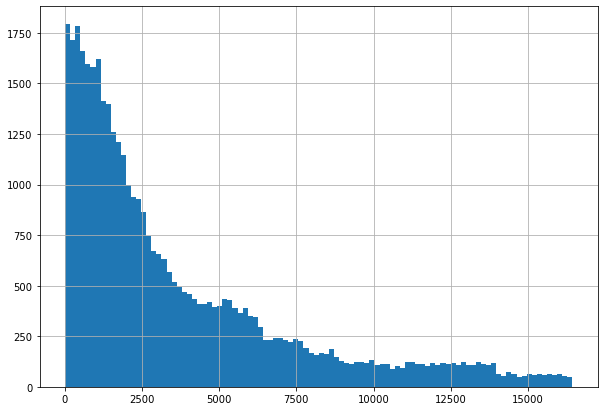

In [1113]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

<AxesSubplot:>

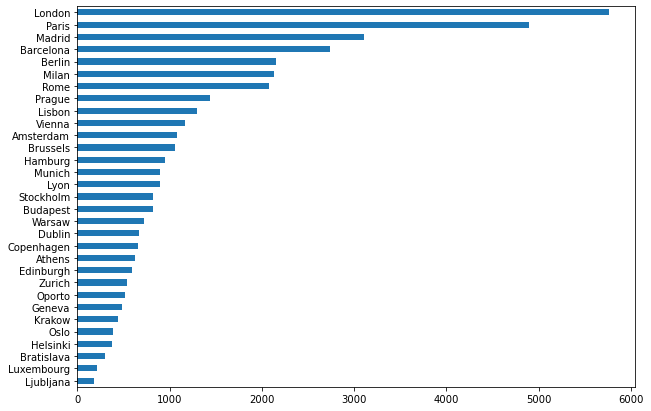

In [1114]:
data['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

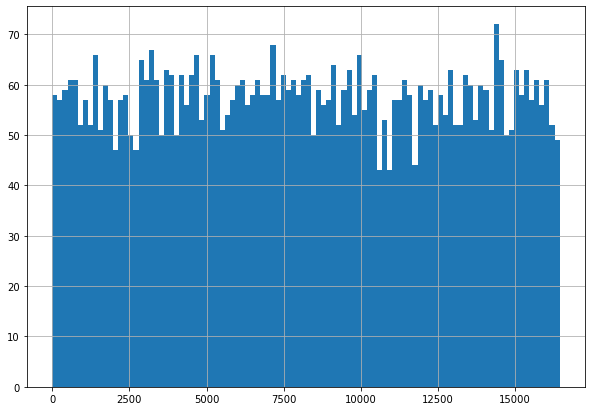

In [1115]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

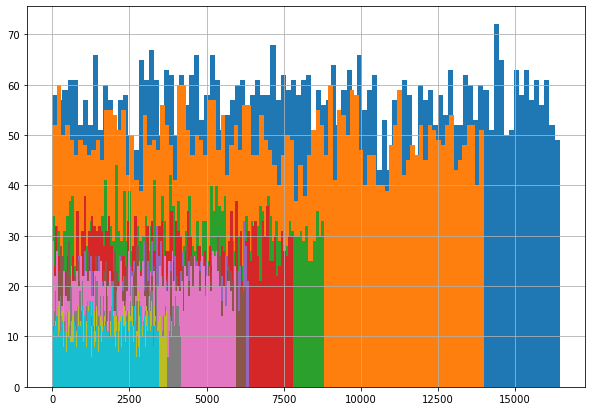

In [1116]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

#### Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение

### посмотрим распределение целевой переменной

<AxesSubplot:>

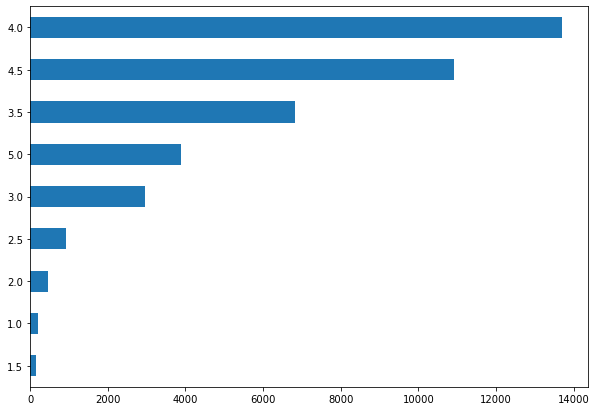

In [1117]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

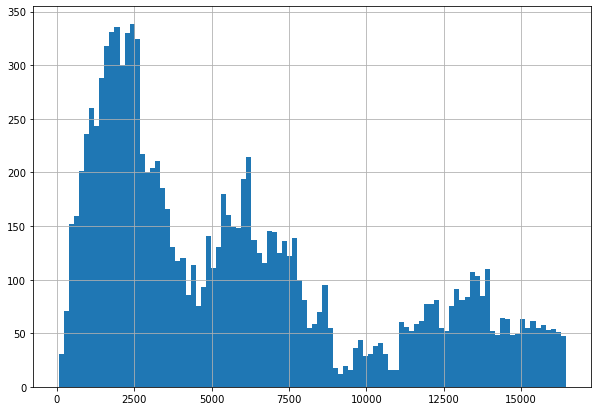

In [1118]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

In [1119]:
# применим нормализацию и создадим новый признак
data['Ranking_norm'] = data['Ranking']/data.City.map(dict(data['City'].value_counts()))

### 4 Rating — рейтинг ресторана по данным TripAdvisor 

In [1120]:
data.loc[:, ['Rating']].info()
display(pd.DataFrame(data.Rating.value_counts()))
data.Rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


,Rating
4.0,13692
4.5,10929
3.5,6824
5.0,3879
3.0,2955
2.5,915
2.0,466
1.0,201
1.5,139


count    40000.000000
mean         3.993037
std          0.668417
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

##### пропусков нет, числовой признак,именно это значение должна будет предсказывать модель, возможные значения от 1 до 5, шаг 0,5

### Price_Range — диапазон цен в ресторане

In [1121]:
data.loc[:, ['Price_Range']].info()
print (pd.DataFrame(data.Price_Range.value_counts())) #display отображает не информативно
data.Price_Range.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price_Range  26114 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB
          Price_Range
$$ - $$$        18412
$                6279
$$$$             1423


count        26114
unique           3
top       $$ - $$$
freq         18412
Name: Price_Range, dtype: object

##### есть пропуски, ординальный признак, необходима обработка

In [1122]:
# заполним пропущенные значения наиболее часто встречающимся
data['Price_Range'] = data['Price_Range'].fillna('$$ - $$$')
# Создадим словарь для преобразования значений уровня цен
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
# выполним преобразование
data['Price_Range'].replace(price_dict, inplace=True)

###  Number_of_Reviews — количество отзывов о ресторане

In [1123]:
# заполним пропуски средним, данную операцию вынесем в предобработку столбца 
data['Number_of_Reviews'].isna().value_counts()
data['Number_of_Reviews'].fillna(125, inplace=True)

In [1124]:
data.loc[:, ['Number_of_Reviews']].info()
display(pd.DataFrame(data.Number_of_Reviews.value_counts()))
data.Number_of_Reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number_of_Reviews  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


,Number_of_Reviews
125.0,2593
2.0,1916
3.0,1636
4.0,1370
5.0,1181
...,...
2035.0,1
1618.0,1
1907.0,1
1757.0,1


count    40000.000000
mean       124.836575
std        286.113295
min          2.000000
25%         10.000000
50%         38.000000
75%        125.000000
max       9660.000000
Name: Number_of_Reviews, dtype: float64

##### есть пропуски, числовой признак, возможно есть выбросы

### Reviews — данные о двух отзывах, которые отображаются на сайте ресторана

In [1125]:
data.loc[:, ['Reviews']].info()
display(pd.DataFrame(data.Reviews.value_counts()))
data.Reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


,Reviews
"[[], []]",6471
"[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]",2
"[['The real codido madrileño'], ['03/31/2017']]",2
"[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]",2
"[['Great food, service and atmosphere', 'Decor and food'], ['11/06/2017', '10/22/2017']]",2
...,...
"[['Seasons best!'], ['09/21/2014']]",1
"[['View, ambience, service, and, not to forge...'], ['08/13/2015']]",1
"[['Terrible guards', 'Noisy pub in the south of city'], ['12/29/2017', '11/23/2017']]",1
"[['Very good!'], ['02/12/2016']]",1


count        40000
unique       33516
top       [[], []]
freq          6471
Name: Reviews, dtype: object

##### есть пропуски, категориальный признак, есть повторояющиеся отзывы, возможно использование для дальнейшего улучшения модели

### URL_TA — URL страницы ресторана на TripAdvisor

In [1126]:
data.loc[:, ['URL_TA']].info()
display(pd.DataFrame(data.URL_TA.value_counts()))
data.URL_TA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL_TA  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


,URL_TA
/Restaurant_Review-g187514-d11674463-Reviews-Beerhouse-Madrid.html,2
/Restaurant_Review-g187514-d7809594-Reviews-La_Guapa-Madrid.html,2
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html,2
/Restaurant_Review-g187514-d10047799-Reviews-Entrepuntos-Madrid.html,2
/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html,2
...,...
/Restaurant_Review-g187323-d11955490-Reviews-Die_Kichererbse-Berlin.html,1
/Restaurant_Review-g187323-d5506536-Reviews-Rice_Roll-Berlin.html,1
/Restaurant_Review-g187514-d10292303-Reviews-Simposium-Madrid.html,1
/Restaurant_Review-g186338-d2569208-Reviews-Comptoir_Libanais-London_England.html,1


count                                                 40000
unique                                                39980
top       /Restaurant_Review-g187514-d11674463-Reviews-B...
freq                                                      2
Name: URL_TA, dtype: object

##### нет пропусков, категориальный признак, есть повторяющиеся значения, непонятно влияние этого параметра на рейтинг, в текущий момент не используем

### ID_TA — идентификатор ресторана в базе данных TripAdvisor

In [1127]:
data.loc[:, ['ID_TA']].info()
display(pd.DataFrame(data.ID_TA.value_counts()))
data.ID_TA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID_TA   40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


,ID_TA
d697406,2
d4600226,2
d9877640,2
d11674463,2
d11921719,2
...,...
d2489499,1
d719229,1
d8664153,1
d6033925,1


count       40000
unique      39980
top       d697406
freq            2
Name: ID_TA, dtype: object

##### нет пропусков, категориальный признак, есть повторяющиеся значения, непонятно влияние этого параметра на рейтинг, в текущий момент не используем

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [1128]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data.drop(['Restaurant_id', 'Rating','City', 'Cuisine_Style', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)
y = data['Rating']

In [1129]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [1130]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [1131]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1132]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [1133]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2182125
